# La methode des volumes finis pour des problèmes de diffusion

## Le problème stationnaire de diffusion 1D

### Description du problème

On considère ici le problème stationnaire de diffusion de la quantité $\phi$ en 1D, régit par l'équation aux dérivées partielles suivante:

\begin{equation}
  \nabla.(\nabla\phi)=\frac{\partial}{\partial x} (\frac{\partial \phi}{\partial x}) = 0 
\end{equation}

### Intégration sur un volume de controle

Pour obtenir l'équation aux volumes finis, l'équation  est intégrée sur un volume de controle
identique à celui de la figure.


\begin{equation}
  \int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \frac{\partial ( u \phi)}{\partial x} dx = 
  \int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \frac{\partial}{\partial x}
  (\Gamma \frac{\partial \phi}{\partial x}) dx + \int^{x_{i + 1 /
  2}}_{x_{i - 1 / 2}} S dx
\end{equation}

### Terme diffusif

Les termes diffusifs peuvent etre intégrés directement par:


\begin{equation}
  \int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \frac{\partial}{\partial x} (\Gamma
  \frac{\partial \phi}{\partial x}) dx = (\Gamma \frac{\partial
  \phi}{\partial x})_{x_{i + 1 / 2}} - (\Gamma \frac{\partial \phi}{\partial
  x})_{x_{i - 1 / 2}}
\end{equation}


Les deux flux diffusifs sont remplacés par leur approximation en
différences finies:

\begin{equation}
  (\Gamma \frac{\partial \phi}{\partial x})_{i + 1 / 2} = 
  \Gamma_{i+1/2} \frac{\phi_i - \phi_{i+1}}{\delta x_i}
\end{equation}

\begin{equation}
  (\Gamma \frac{\partial \phi}{\partial x})_{i - 1 / 2} = 
  \Gamma_{i-1/2} \frac{\phi_i - \phi_{i-1}}{\delta x_{i-1}}
\end{equation}

avec :
* $\delta x_i = x_{i+1} - x_i$
* $\delta x_{i-1} = x_{i} - x_{i-1}$

In [1]:
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

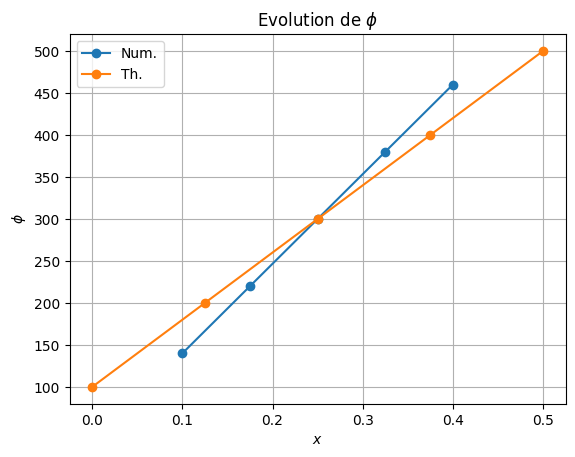

In [4]:
# Creation du maillage
N = 5                      # Nb de cellules
L = 0.5                     # Longueur du domaine
dx = L / (N)               # Pas d'espace
x = np.linspace(dx,L-dx,N) # Maillage 1D (abscisse centre des cellules)

a = np.zeros((N,N))       # Matrice du schéma numérique
s = np.zeros(N)            # Vecteur second membre

# Paramètres physiques
phiA = 100                    # Température de paroi
phiB = 500                    # Température de paroi

#
# Remplissage de la matrice du système linéaire
#

# Noeud 0 ordre 2
# aW = 0
# aE = 4/(3*dx)
# Sp = -2/dx
# Su =  8*phiA/(3*dx)
# aP = 4/dx

# Noeud 0 ordre 1 
a[0,0] = 3/dx
a[0,1] = -1/dx
s[0] = 2*phiA/dx

# Noeuds interieurs ordre 2
for i in range(1, N-1):
    a[i,i-1] = -1/dx
    a[i,i] = 2/dx
    a[i,i+1] = -1/dx
    s[i] = 0

# Noeud 4 ordre 2
# aW = 4/(3*dx)
# aE = 0
# Sp = -2/dx
# Su =  8*TB/(3*dx)
# aP = 4/dx

# Noeud 4 ordre 1
a[N-1,N-2] = -1/dx
a[N-1,N-1] = 3/dx
s[N-1] = 2*phiB/dx

# Calcul de la solution
phi = np.linalg.solve(a,s)

# Solution analytique
x_ana = np.linspace(0,L,N)
phi_ana = (phiB-phiA)*x_ana/L+phiA

# Affichage de la solution
plt.figure()
plt.grid()
plt.title(r"Evolution de $\phi$")
plt.plot(x,phi,'-o',label="Num.")
plt.plot(x_ana,phi_ana,'-o',label="Th.")
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()


In [9]:
phi

array([140., 220., 300., 380., 460.])

## Influence du maillage


Afin de tester l'influence de la discrétisation spatiale sur les résultats et montrer une convergence en maillage testons différents niveaux de discrétisation :
 - $N=5$
 - $N = 10$
 - $N = 100$

 Pour cela il est plus facile de créer une fonction qui va ,entre autre, prendre comme argument le nombre de cellules $N$ du maillage.

In [11]:
def diffusion(L,N,phiA,phiB):
    # Creation du maillage
    dx = L / (N)               # Pas d'espace
    x = np.linspace(dx,L-dx,N) # Maillage 1D (abscisse centre des cellules)

    a = np.zeros((N,N))       # Matrice du schéma numérique
    s = np.zeros(N)            # Vecteur second membre

    #
    # Remplissage de la matrice du système linéaire
    #

    # Noeud 0 ordre 1 
    a[0,0] = 3/dx
    a[0,1] = -1/dx
    s[0] = 2*phiA/dx

    # Noeuds interieurs ordre 2
    for i in range(1, N-1):
        a[i,i-1] = -1/dx
        a[i,i] = 2/dx
        a[i,i+1] = -1/dx
        s[i] = 0

    # Noeud 4 ordre 1
    a[N-1,N-2] = -1/dx
    a[N-1,N-1] = 3/dx
    s[N-1] = 2*phiB/dx

    # Calcul de la solution
    phi = np.linalg.solve(a,s)

    # Renvoi de la solution
    return x, phi

In [12]:
# Résolutions des différents maillages
N1 = 5
N2 = 10
N3 = 100

# Paramètres physiques
L= 0.5 
phiA = 100                    # Température de paroi
phiB = 500                    # Température de paroi

# Solutions obtenues pour les différents maillages
x1, phi1 = diffusion(L,N1,phiA,phiB)
x2, phi2 = diffusion(L,N2,phiA,phiB)
x3, phi3 = diffusion(L,N3,phiA,phiB)

# Solution analytique
x_ana = np.linspace(0,L,N1)
phi_ana = (phiB-phiA)*x_ana/L+phiA


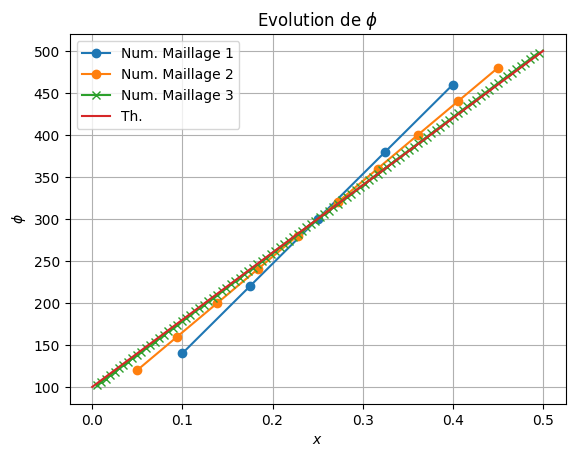

In [13]:
# Affichage de la solution
plt.figure()
plt.grid()
plt.title(r"Evolution de $\phi$")
plt.plot(x1,phi1,'-o',label="Num. Maillage 1")
plt.plot(x2,phi2,'-o',label="Num. Maillage 2")
plt.plot(x3,phi3,'-x',label="Num. Maillage 3")
plt.plot(x_ana,phi_ana,'-',label="Th.")
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()

## Résolution par la méthode de Gauss-Seidel

In [17]:
def gauss_seidel(a, b, tol=1e-12, maxIter=10000):
    """
    Resoud un systeme d'eq; lineaires de la forme Ax = b avec la methode iterative de Gauss-Seidel
    'A': Matrice (n, n)
    'b': Second membre (n, 1)
    'tol': tolerance a atteindre
    'maxIter': nb max d'iterations
    """
    iters = 1  # Iteration du processus

    nLig, nCol = np.shape(a)
    n = nLig  # Dimension de la matrice a(n,n)
    x = np.random.rand(n) * 5  # Initialisation de la solution à l'iteration 0
    sigmaTol = 1  # Pour calcul de la tolerance

    while True:
        if iters > maxIter:
            print("Le Nb max d'iterations est atteint. Fin.")
            break

        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += a[i, j] * x[j]
            x[i] = (b[i] - sigma) / a[i, i]

        tolerance = abs(sigmaTol - sigma)
        if tolerance <= tol:
            print("La precision visee est atteinte en \t %d iterations." % (iters))
            break

        sigmaTol = sigma
        iters += 1

    return x

In [18]:
def diffusion_gs(L,N,phiA,phiB):
    # Creation du maillage
    dx = L / (N)               # Pas d'espace
    x = np.linspace(dx,L-dx,N) # Maillage 1D (abscisse centre des cellules)

    a = np.zeros((N,N))       # Matrice du schéma numérique
    s = np.zeros(N)            # Vecteur second membre

    #
    # Remplissage de la matrice du système linéaire
    #

    # Noeud 0 ordre 1 
    a[0,0] = 3/dx
    a[0,1] = -1/dx
    s[0] = 2*phiA/dx

    # Noeuds interieurs ordre 2
    for i in range(1, N-1):
        a[i,i-1] = -1/dx
        a[i,i] = 2/dx
        a[i,i+1] = -1/dx
        s[i] = 0

    # Noeud 4 ordre 1
    a[N-1,N-2] = -1/dx
    a[N-1,N-1] = 3/dx
    s[N-1] = 2*phiB/dx

    # Calcul de la solution
    phi = gauss_seidel(a, s, tol=1e-12, maxIter=10000)

    # Renvoi de la solution
    return x, phi

In [20]:
# Maillage
N = 5                # Nb de cellules
L = 0.5               # Longueur du domaine

# Paramètres physiques
phiA = 100        # Température de paroi
phiB = 500        # Température de paroi

# Calcul de la solution par la méthode de Gauss-Seidel
x_gs, phi_gs = diffusion_gs(L,N,phiA,phiB)

# Solution analytique
x_ana = np.linspace(0,L,N1)
phi_ana = (phiB-phiA)*x_ana/L+phiA

La precision visee est atteinte en 	 87 iterations.


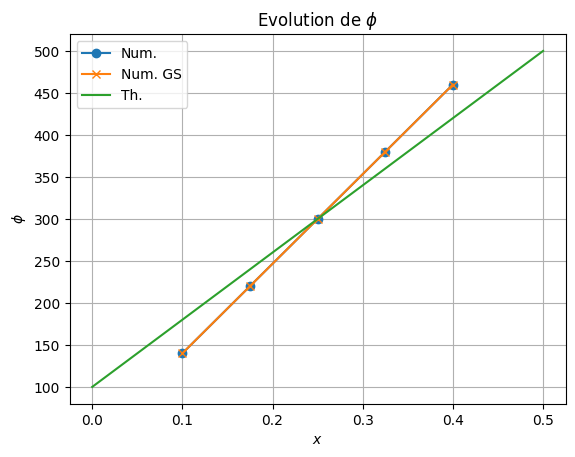

In [22]:
# Affichage de la solution
plt.figure()
plt.grid()
plt.title(r"Evolution de $\phi$")
plt.plot(x,phi,'-o',label="Num.")
plt.plot(x_gs,phi_gs,'-x',label="Num. GS")
plt.plot(x_ana,phi_ana,'-',label="Th.")
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()

In [14]:
phi

array([140., 220., 300., 380., 460.])

In [15]:
TGS

array([139.99999986, 219.99999972, 299.99999972, 379.99999981,
       459.99999994])